강아지 고양이 분류하기 

데이터 불러오기

Colab을 이용 - Google api를 통해 데이터 불러오기

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip


--2020-08-20 09:20:02--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 66.102.1.128, 74.125.133.128, 74.125.140.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|66.102.1.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   170MB/s    in 0.4s    

2020-08-20 09:20:03 (170 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



데이터 폴더 나누기 (강아지, 고양이)

In [2]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
rootPath = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(rootPath, 'train')
validation_dir = os.path.join(rootPath, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


데이터 확인하기 

In [3]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))


['cat.41.jpg', 'cat.168.jpg', 'cat.237.jpg', 'cat.83.jpg', 'cat.974.jpg', 'cat.560.jpg', 'cat.580.jpg', 'cat.897.jpg', 'cat.565.jpg', 'cat.360.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']
total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


데이터 증식 Data Argumentation

In [4]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

rootPath = '/tmp/cats_and_dogs_filtered'

imageGenerator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[.2, .2],
    horizontal_flip=True,
    validation_split=.1
)

trainGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath, 'train'),
    target_size=(64, 64),
    subset='training'
)

validationGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath, 'validation'),
    target_size=(64, 64),
    subset='validation'
)


Found 1800 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


간단한 CNN 모델을 구성

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential()

model.add(layers.InputLayer(input_shape=(64, 64, 3)))
model.add(layers.Conv2D(16, (3, 3), (1, 1), 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Conv2D(32, (3, 3), (1, 1), 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Conv2D(64, (3, 3), (1, 1), 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid')) #(비교하는 거니깐) 두개의 예측확률을 보고 싶기 때문에 /둘이 비교할건지 나온 하나의 값을 기준치를 기준으로 결과를 낼건지


모델 설정하기


In [6]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy', 
    metrics=['acc'],
)


모델 학습 시키기

In [7]:
epochs = 32
history = model.fit_generator(
    trainGen, 
    epochs=epochs,
    steps_per_epoch=trainGen.samples / epochs, 
    validation_data=validationGen,
    validation_steps=trainGen.samples / epochs,
)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/32
57/56 [==============================] - 9s 153ms/step - loss: 0.6940 - acc: 0.4917 - val_loss: 0.6930 - val_acc: 0.5000
Epoch 2/32
57/56 [==============================] - 8s 141ms/step - loss: 0.6922 - acc: 0.5194
Epoch 3/32
57/56 [==============================] - 8s 141ms/step - loss: 0.6803 - acc: 0.5572
Epoch 4/32
57/56 [==============================] - 8s 140ms/step - loss: 0.6664 - acc: 0.6017
Epoch 5/32
57/56 [==============================] - 8s 139ms/step - loss: 0.6527 - acc: 0.6222
Epoch 6/32
57/56 [==============================] - 8s 139ms/step - loss: 0.6344 - acc: 0.6456
Epoch 7/32
57/56 [==============================] - 8s 139ms/step - loss: 0.6421 - acc: 0.6250
Epoch 8/32
57/56 [==============================] - 8s 140ms/step - loss: 0.6138 - acc: 0.6733
Epoch 9/32
57/56 [==============================] - 8s 139ms/step - loss: 0.6192 - acc: 0.6628
Epoch 10/32
57/56 [=============

학습결과 그리기

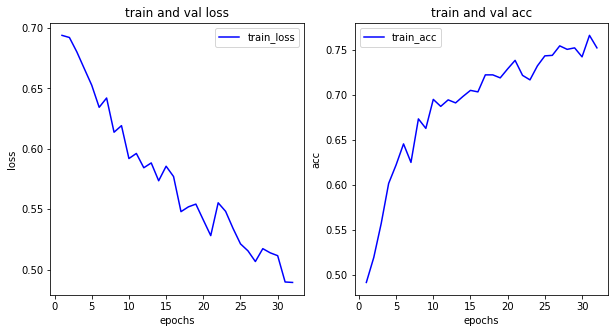

In [10]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
#ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
#ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()


모델 평가하기 

In [11]:
model.evaluate_generator(validationGen)


Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.48620614409446716, 0.75]

모델 예측하기 

[[0.4242349  0.58182204]]
예측: 개
정답: 고양이


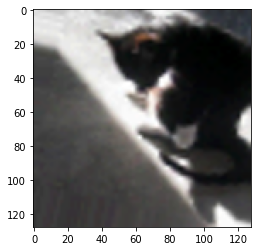

In [13]:
from tensorflow.keras.preprocessing.image import array_to_img
import numpy as np

cls_index = ['고양이', '개']

imgs = validationGen.next()
arr = imgs[0][0]
img = array_to_img(arr).resize((128, 128))
plt.imshow(img)
result = model.predict_classes(arr.reshape(1, 64, 64, 3))
result2 = model.predict(arr.reshape(1, 64, 64, 3))

print(result2)
print('예측: {}'.format(cls_index[result[0]]))
print('정답: {}'.format(cls_index[np.argmax(imgs[1][0])]))
